In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from icedef import constants, iceberg, metocean, drift, tools, simulator, test_case, plot, timesteppers

In [3]:
tc = test_case.TestCase()
start_latitude = tc.start_latitude
start_longitude = tc.start_longitude
start_velocity = tc.start_velocity
start_time = tc.start_time
end_time = tc.end_time
ref_times = tc.ref_times
ref_lons = tc.ref_lons
ref_lats = tc.ref_lats
start_location = (tc.start_latitude, tc.start_longitude)
time_frame = (tc.start_time, tc.end_time)
start_velocity = tc.start_velocity

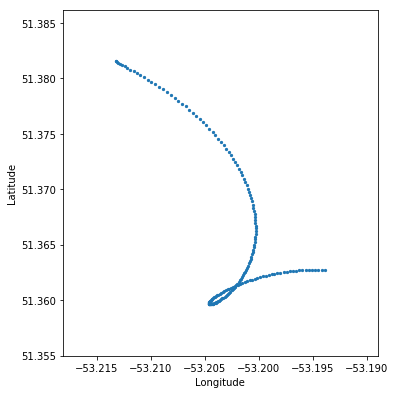

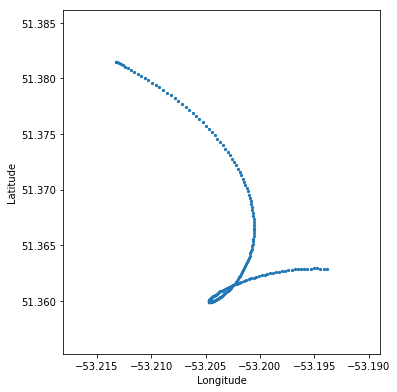

In [8]:
sim = simulator.Simulator()

sim.run_simulation(start_location, time_frame, store_results_as='euler')
plot.plot_iceberg_track(sim.results['euler']['latitude'], sim.results['euler']['longitude'])

sim.time_stepper = timesteppers.am2
sim.run_simulation(start_location, time_frame, store_results_as='am2')
plot.plot_iceberg_track(sim.results['am2']['latitude'], sim.results['am2']['longitude'])


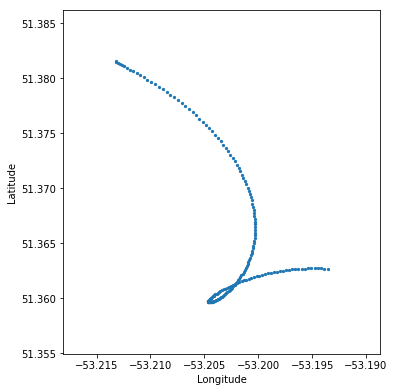

In [4]:
xds2 = simulator.run_test_simulation(start_location, time_frame, constant_current_acceleration=(0, 0))

plot.plot_iceberg_track(xds2['latitude'], xds2['longitude'])

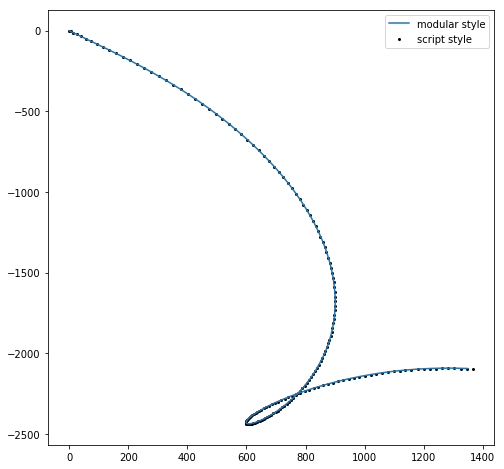

In [5]:
plt.figure(figsize=(8, 8))
plt.plot(xds['easting'], xds['northing'], label='modular style')
plt.scatter(xds2['easting'], xds2['northing'], label='script style', s=4, c='black')
plt.legend()
plt.show()

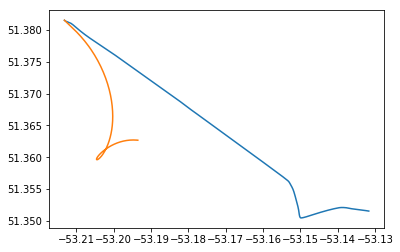

In [6]:
sim = simulator.Simulator(time_stepper=timesteppers.rk2)
sim.time_step = np.timedelta64(30, 's')

xds = sim.run_simulation(start_location, time_frame)

plt.plot(xds['longitude'], xds['latitude'], label='1')
plt.plot(xds2['longitude'], xds2['latitude'], label='2')
plt.show()